In [1]:
import os
import pandas as pd
from PIL import Image
from torchvision import transforms

In [14]:
class CustomImageDataset():
    def __init__(self, annotations_dir, img_dir, transform=None):
        self.img_labels = pd.read_csv(annotations_dir)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.img_labels.iloc[idx, 0]) + '.jpg')
        image = Image.open(img_path).convert("RGB")
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

In [19]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_dataset = CustomImageDataset(
    annotations_dir=os.path.join("human_poses_data", "train_answers.csv"),
    img_dir=os.path.join("human_poses_data", "img_test"),
    transform=transform
)

train_dataset = CustomImageDataset(
    annotations_dir=os.path.join("human_poses_data", "train_answers.csv"),
    img_dir=os.path.join("human_poses_data", "img_train"),
    transform=transform
)

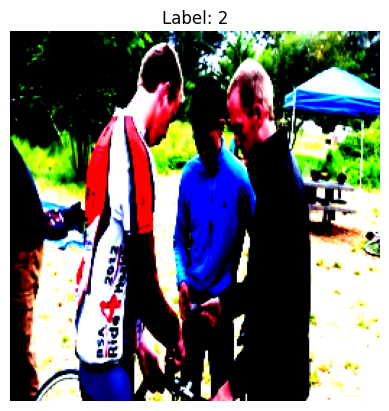

In [20]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

image, label = train_dataset[0]
image = image.permute(1, 2, 0).numpy()

plt.imshow(image.clip(0, 1))
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()